In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_json("Sarcasm_Headlines_Dataset.json", lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [6]:
df['is_sarcastic'].value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

<AxesSubplot:xlabel='is_sarcastic', ylabel='count'>

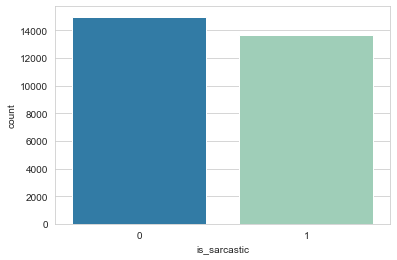

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='is_sarcastic',data=df, palette='YlGnBu_r')

In [8]:
from sklearn.model_selection import train_test_split
X=df['headline'].values
y=df['is_sarcastic'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [9]:
vocab_size=10000
embedding_dim=16
max_length=32
trunc_type='post'
padding_type='post'
oov_tok='<oov>'
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen = max_length, padding = padding_type, truncating=trunc_type)
testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, padding = padding_type, truncating=trunc_type)

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Flatten())
model.add(Dense(units=32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 16)            160000    
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                16416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model.fit(x=training_padded, y=y_train, batch_size=256, epochs=100, validation_data=(testing_padded, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5197 - val_loss: 0.6912 - val_accuracy: 0.5238
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5320 - val_loss: 0.6896 - val_accuracy: 0.5348
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5460 - val_loss: 0.6867 - val_accuracy: 0.5634
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.5582 - val_loss: 0.6819 - val_accuracy: 0.5969
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5791 - val_loss: 0.6726 - val_accuracy: 0.6568
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.6151 - val_loss: 0.6556 - val_accuracy: 0.7074
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.6472 - val_loss: 0.6284 - val_accuracy: 0.7706
Epoch 8/100
7

In [13]:
df_m=pd.DataFrame(model.history.history)
df_m['Epoch']=range(1,30)
df_m.index=df_m['Epoch']
df_m

,loss,accuracy,val_loss,val_accuracy,Epoch
Epoch,,,,,
1,0.692168,0.519742,0.691247,0.523760,1
2,0.690689,0.532022,0.689570,0.534824,2
3,0.688480,0.545999,0.686731,0.563359,3
4,0.685097,0.558229,0.681907,0.596902,4
5,0.679442,0.579144,0.672551,0.656767,5
6,0.667556,0.615135,0.655561,0.707431,6
7,0.647653,0.647182,0.628439,0.770557,7
8,0.620723,0.684521,0.593403,0.802819,8
9,0.584376,0.721859,0.552684,0.815281,9


In [14]:
score = model.evaluate(testing_padded, y_test, batch_size=64, verbose=1)
print('Test accuracy:', score[1])

135/135 [==============================] - 0s 597us/step - loss: 0.3274 - accuracy: 0.8628
Test accuracy: 0.862799882888794


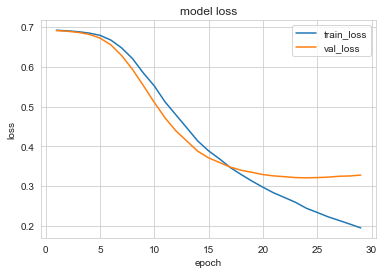

In [15]:
plt.plot(df_m['loss'])
plt.plot(df_m['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0   30   11    7  509 3698  409]]


ValueError: in user code:

    /Users/akshatdave/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1147 predict_function  *
        outputs = self.distribute_strategy.run(
    /Users/akshatdave/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/akshatdave/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/akshatdave/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/akshatdave/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1122 predict_step  **
        return self(x, training=False)
    /Users/akshatdave/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    /Users/akshatdave/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:277 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /Users/akshatdave/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/network.py:717 call
        return self._run_internal_graph(
    /Users/akshatdave/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/network.py:888 _run_internal_graph
        output_tensors = layer(computed_tensors, **kwargs)
    /Users/akshatdave/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:885 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    /Users/akshatdave/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 512 but received input with shape [1, 448]
